In [1]:
%matplotlib inline
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
# From numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)
print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]], dtype=torch.int32) 



In [4]:
# From another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9566, 0.8728],
        [0.9157, 0.2495]]) 



In [5]:
# Random or constant values
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2286, 0.3099, 0.8449],
        [0.5508, 0.9943, 0.6485]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
# Tensor attributes
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
# Operations on tensors
# To GPU
if  torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [8]:
# Standard numpy-like indexing and slicing
tensor = torch.ones(4,4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
# Joining tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
# Arithmetic operations

# Matrix multiplication
y1 = tensor @ tensor.T
print("y1: ", y1)
y2 = tensor.matmul(tensor.T)
print("y2: ", y2)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)
print("y3: ", y3)

# Element-wise product
z1 = tensor * tensor
print("z1: ", z1)
z2 = tensor.mul(tensor)
print("z2: ", z2)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print("z3: ", z3)

y1:  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
y2:  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
y3:  tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
z1:  tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
z2:  tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
z3:  tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [11]:
# Single-elements tensors
agg = tensor.sum()
print(agg, type(agg))
agg_item = agg.item()
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


In [12]:
# In-place operations
"""
Operations that store the result into the operand are 
called in-place. They're denoted by a _ suffix. 
For example: x.copy_(y), x.t_(), will change x.
"""
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [13]:
# Bridge with numpy

# 1. Tensor to Numpy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [15]:
# Numpy array to tensor
n = np.ones(5)
t = torch.from_numpy(n)

In [16]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [17]:
# Datasets and Dataloaders
"""
Dataset stores the samples and their corresponding labels, 
and DataLoader wraps an iterable around the Dataset to 
enable easy access to the samples
"""
# Loading a dataset 

%matplotlib inline
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

c:\Users\johna\miniconda3\envs\env\Lib\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(


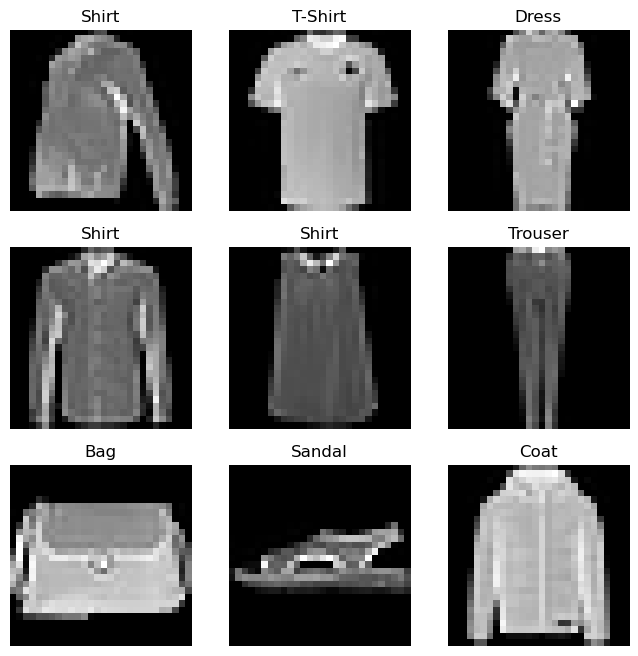

In [18]:
# Iterating and visualizing the Dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [19]:
# Preparing data for training with DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


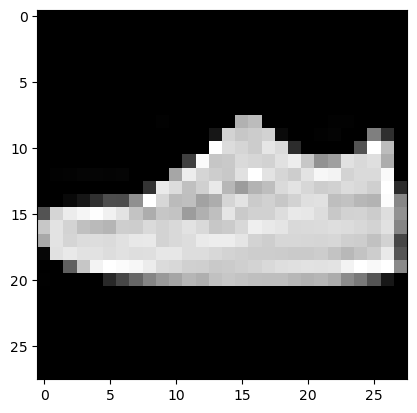

Label: Sneaker


In [20]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
label_name = list(labels_map.values())[label]
print(f"Label: {label_name}")


In [21]:
# Normalization
"""data preprocessing technique that's applied to scale or 
transform the data to make sure there's an equal learning 
contribution from each feature (Microsoft)
"""

# Transforms
"""Manipulate the data to make it suitable for training"""

from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # converts to tensor and scale in range [0,1]
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float)
                            .scatter_(0, torch.tensor(y), value=1))
                            # torch.nn.functional.one_hot
)

In [22]:
# Building a neural network
import torch.nn as nn

# Get hardware for training
device = "cuda" if torch.cuda.is_available() else "cpu"
print('Using {} device'.format(device))

Using cpu device


In [23]:
# Define the network class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [24]:
# Instance of the NeuralNEtwork
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [25]:
# Optimizing the model parameters
# seting hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [26]:
# Train and test
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        # computer prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss , current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /=size
    correct /=size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [27]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301643 [    0/60000]
loss: 2.293468 [ 6400/60000]
loss: 2.287719 [12800/60000]
loss: 2.279521 [19200/60000]
loss: 2.264322 [25600/60000]
loss: 2.264799 [32000/60000]
loss: 2.235586 [38400/60000]
loss: 2.256524 [44800/60000]
loss: 2.223070 [51200/60000]
loss: 2.206876 [57600/60000]
Test Error: 
 Accuracy: 40.5%, Avg loss: 0.034841 

Epoch 2
-------------------------------
loss: 2.224434 [    0/60000]
loss: 2.206681 [ 6400/60000]
loss: 2.234478 [12800/60000]
loss: 2.172060 [19200/60000]
loss: 2.155501 [25600/60000]
loss: 2.148893 [32000/60000]
loss: 2.127159 [38400/60000]
loss: 2.095894 [44800/60000]
loss: 2.057322 [51200/60000]
loss: 2.136148 [57600/60000]
Test Error: 
 Accuracy: 43.9%, Avg loss: 0.033027 

Epoch 3
-------------------------------
loss: 2.134140 [    0/60000]
loss: 2.113019 [ 6400/60000]
loss: 2.053939 [12800/60000]
loss: 2.021535 [19200/60000]
loss: 1.944070 [25600/60000]
loss: 2.033104 [32000/60000]
loss: 1.968898 [38400/

In [28]:
# Saving models
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [29]:
# Load the model
import onnxruntime
import onnx
import torch.onnx as onnx
import torchvision.models as models
from torchvision.transforms import ToTensor

model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

C:\Users\johna\AppData\Local\Temp\ipykernel_30616\3034000960.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('data/model.pth'))


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [30]:
# Model Inference
# exporting the model to ONNX
input_image = torch.zeros((1,28,28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

In [31]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

In [32]:
session = onnxruntime.InferenceSession(onnx_model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Sneaker", Actual: "Ankle boot"


In [33]:
# Execute the forward 
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8])


In [34]:
# Weight and Bias
print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")
print(f"First Linear biases: {model.linear_relu_stack[0].bias} \n")

First Linear weights: Parameter containing:
tensor([[ 0.0343, -0.0243, -0.0176,  ..., -0.0265,  0.0078, -0.0345],
        [ 0.0172, -0.0147,  0.0220,  ..., -0.0148,  0.0159, -0.0016],
        [-0.0264, -0.0203,  0.0355,  ...,  0.0087, -0.0325, -0.0116],
        ...,
        [-0.0024, -0.0227, -0.0156,  ..., -0.0235,  0.0313,  0.0160],
        [-0.0260,  0.0131, -0.0018,  ...,  0.0021,  0.0157,  0.0275],
        [-0.0230, -0.0304,  0.0150,  ..., -0.0316, -0.0148, -0.0174]],
       requires_grad=True) 

First Linear biases: Parameter containing:
tensor([ 0.0339, -0.0069, -0.0153, -0.0154,  0.0213, -0.0254, -0.0132,  0.0130,
         0.0039, -0.0213,  0.0146,  0.0060, -0.0066,  0.0268,  0.0342, -0.0108,
         0.0312, -0.0108,  0.0285, -0.0054,  0.0280, -0.0030,  0.0068,  0.0043,
         0.0006,  0.0440,  0.0028,  0.0031,  0.0104,  0.0013,  0.0210,  0.0161,
        -0.0338, -0.0297, -0.0212,  0.0142,  0.0144, -0.0090, -0.0052,  0.0035,
        -0.0082, -0.0106,  0.0220, -0.0330, -0.000

In [35]:
# Model layers
input_image = torch.rand(3, 28,28)
print(input_image.size())

# nn.Flatten
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image)

torch.Size([3, 28, 28])
tensor([[0.5171, 0.6344, 0.1499,  ..., 0.5992, 0.6725, 0.9575],
        [0.2872, 0.1396, 0.1416,  ..., 0.8115, 0.6580, 0.2655],
        [0.1061, 0.1373, 0.2609,  ..., 0.4297, 0.0294, 0.1394]])


In [36]:
# nn.Linear
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

# nn.ReLU
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

torch.Size([3, 20])
Before ReLU: tensor([[-0.4006, -0.2116,  0.5496,  0.7501, -0.0242, -0.3203,  0.2135, -0.1093,
          0.0547, -0.3407, -0.3997,  0.6364, -0.1123, -0.3148, -0.0125,  0.1390,
         -0.2662, -0.8416,  0.2030, -0.1344],
        [-0.2807,  0.3322,  0.4258,  0.4612,  0.2416, -0.5067,  0.1763, -0.0357,
          0.3394, -0.1820, -0.3676,  0.5069,  0.0657, -0.7062,  0.0491,  0.0610,
          0.1415, -0.9967,  0.0993, -0.0356],
        [-0.3394,  0.0897,  0.5178,  0.2155,  0.1957, -0.2479,  0.4746,  0.1045,
          0.5691, -0.6181, -0.0823,  0.7801, -0.2778, -0.7639,  0.1005,  0.2597,
         -0.2077, -0.9008,  0.3815, -0.0729]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.5496, 0.7501, 0.0000, 0.0000, 0.2135, 0.0000, 0.0547,
         0.0000, 0.0000, 0.6364, 0.0000, 0.0000, 0.0000, 0.1390, 0.0000, 0.0000,
         0.2030, 0.0000],
        [0.0000, 0.3322, 0.4258, 0.4612, 0.2416, 0.0000, 0.1763, 0.0000, 0.3394,
         0.0000, 0.0000, 0.5069, 

In [37]:
# nn.Sequential
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [38]:
# nn.Softmax
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [39]:
# Model parameters
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0343, -0.0243, -0.0176,  ..., -0.0265,  0.0078, -0.0345],
        [ 0.0172, -0.0147,  0.0220,  ..., -0.0148,  0.0159, -0.0016]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0339, -0.0069], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0423,  0.0279, -0.0216,  ...,  0.0179,  0.0002, -0.0074],
        [-0.0004, -0.0321,  0.0244,  ...,  0.0352,  0.0101, -0.0357]],
       grad_fn=<SliceBackward0>) 

Layer: linear_re

In [40]:
# Automatic differentiation with
"""
The back and forward process of retraining the model over 
time to reduce the loss to 0 is called the gradient descent
"""
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [41]:
print("x:", x)
print("y:", y)
print("w:", w)
print("b:", b)
print("z:", z)
print("loss:", loss)

x: tensor([1., 1., 1., 1., 1.])
y: tensor([0., 0., 0.])
w: tensor([[ 0.6947,  1.0184, -1.2398],
        [-0.3285, -0.4938,  0.9389],
        [ 0.2005,  0.8191, -0.0051],
        [ 1.4920,  0.2897, -1.4613],
        [-0.0882,  0.6512,  0.2333]], requires_grad=True)
b: tensor([-0.4235, -0.2348,  0.5172], requires_grad=True)
z: tensor([ 1.5470,  2.0497, -1.0169], grad_fn=<AddBackward0>)
loss: tensor(1.4065, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [42]:
# Tensors, functions and computational graphs
print('Gradient function of z =', z.grad_fn)
print('Gradient function of loss =', loss.grad_fn)

# Computing gradients
"""
If we need to do several backward calls on the same graph, 
we need to pass retain_graph=True to the backward call.
"""
loss.backward
print(w.grad)
print(b.grad)

Gradient function of z = <AddBackward0 object at 0x0000023B0EE35270>
Gradient function of loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000023B0EE35270>
None
None


In [43]:
# Disabling gradient tracking
"""
Cases when we don't need to do that, for example, 
when we've trained the model and just want to apply 
it to some input data; only want to 
do forward computations through the network.
"""
z = torch.matmul(x, w) + b
print(z.requires_grad)

# Approach 1
with torch.no_grad():
    z = torch.matmul(x , w) + b
print(z.requires_grad)

# Approach 2 to achieve above results
z = z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

True
False
False


In [44]:
# Tensor gradients and Jacobian products
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("First call\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSecond call\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nCall after zeroing gradients\n", inp.grad)

First call
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Second call
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Call after zeroing gradients
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])
